I have the dataset of 1000 reviews. The next step is preprocessing the data. So, we have to clean up the data. If there are any unwanted or missing data, we have to do the preprocessing of the data. Once the data is preprocessed, we will be creating a model.

So here we will create Logistic Regression Model. Logistic Regression is a statistical analysis method to predict a binary outcome such as yes/no, based on the prior observations of the dataset. Logistic Regression classifies the data whether it is positive or negative.

Once we create the model, we have to train the model with the preprocessed data. 80% of the data will be used to train the model, and the remaining 20% will be used to test the model.

Once we are satisfied with the evaluation of the model in the testing phase, we are going to save the model and deploy it as a web app.

Tools for this project -
1. NLTK - python library for NLP processing
2. Sci-kit learn - this library contains Logistic Regression model.
3. WordCloud - This libray draw a graphical representation of the words in that particular document.
4. Matplotlib - to draw charts.
5. Numpy - to perform a wide variety of mathematical operations on arrays.
6. Pandas - It has functions for analyzing, cleaning, exploring, and manipulating data.
7. Streamlit - To deploy this machine learning model



In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import nltk
from nltk.corpus import stopwords

In [2]:
data = pd.read_csv('Movie_Review.csv')

In [3]:
data.dropna(inplace=True)

In [ ]:
# we don't have any missing values

# lets do some clean up in the text.
# we might be having some kind of stopwords will be there..
# which are not going to give much context about the data..
# lets remove those stopwords from here.

In [4]:
def clean_review(review):
    str = ' '.join(word for word in review.split() if word.lower() not in stopwords.words('english'))
    return str

# we are checking each and every word in this review..
# we are splitting it up and we are converting it into the lower case and we are checking that lower case word should not be part of the stopwords in English language

In [5]:
# now lets apply it to the entire data.

data['text'] = data['text'].apply(clean_review)

In [6]:
# create a wordcloud
# it will print all the words in the document in a image
# but it won't print all the words in the doc in a different size,
# based on the number of times that particular word has been repeated in the document.
# if the font is bigger, the word has been repeated more number of times in the document.

# now lets draw the word cloud for the negative sentiment records.

from wordcloud import WordCloud

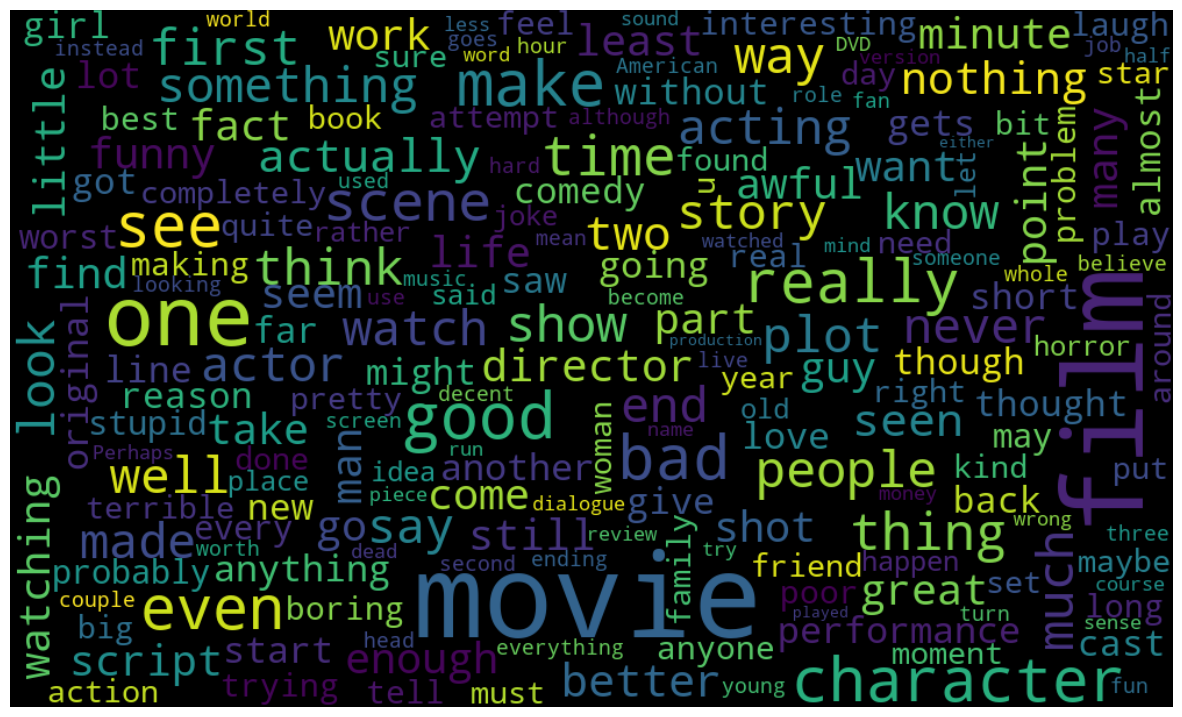

In [7]:
# draw WordCloud
# first take all the words in negative reviews

reviews = ' '.join(word for word in data['text'][data['sentiment'] == 'neg'].astype(str))

# here, we are taking each and every word in the reviews, where the sentiment = negative


# lets create an object for the wordcloud

wordcloud = WordCloud(height = 600,width =1000, max_font_size = 100)
plt.figure(figsize = (15,12))
plt.imshow(wordcloud.generate(reviews), interpolation='bilinear')
plt.axis('off')
plt.show()

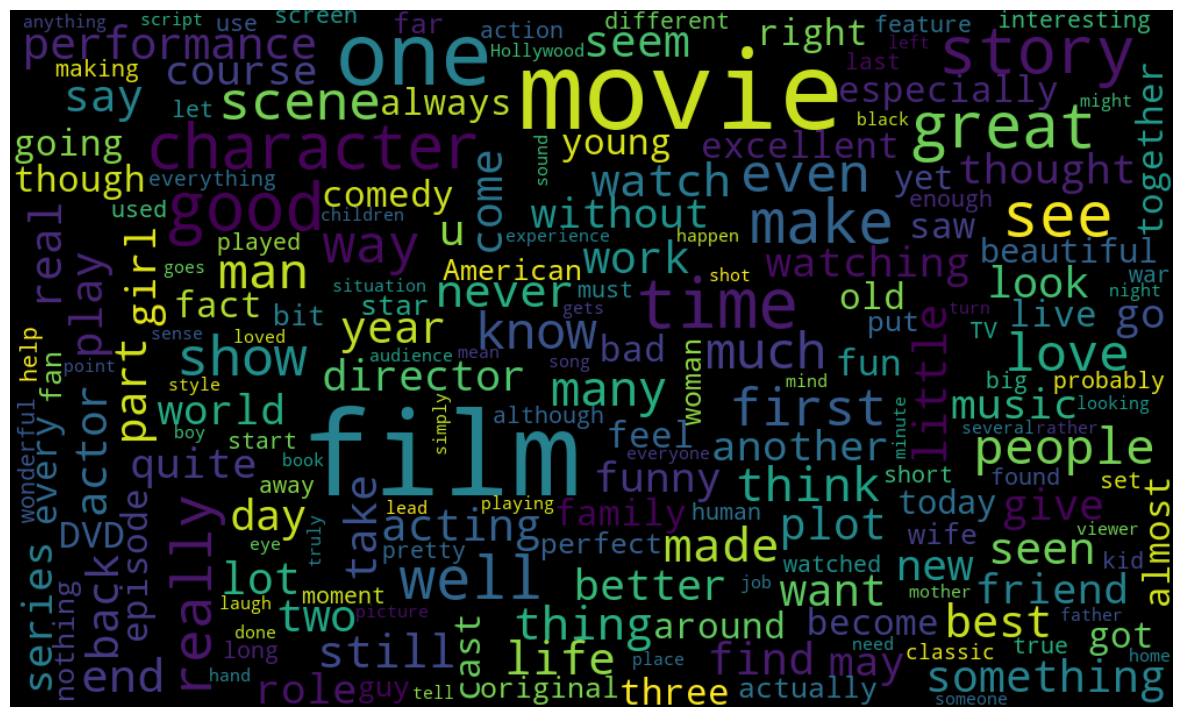

In [8]:
reviews = ' '.join(word for word in data['text'][data['sentiment']== 'pos'].astype(str))
wordcloud = WordCloud(height = 600, width = 1000, max_font_size =100)
plt.figure(figsize=(15,12))
plt.imshow(wordcloud.generate(reviews), interpolation='bilinear')
plt.axis('off')
plt.show()

In [ ]:
# now we have all this text data, but the model we are going to use here is Logistic Regression.
# LR works on statistical data. So we have to convert text data into numerical data. Then we'll feed into our model

# "tfid vectorizer" converts text data into numerical format.
# import it from sklearm

In [9]:
from sklearn.feature_extraction.text import TfidfVectorizer
cv = TfidfVectorizer(max_features=2500)

In [10]:
reviews = cv.fit_transform(data['text']).toarray()

# now our reviews are converted into the numerical format.

In [11]:
# in the same way lets convert positive and negative of the sentiment also in numerical values.

data['sentiment'] = data['sentiment'].replace(['pos','neg'],[1,0])

C:\Users\hp\AppData\Local\Temp\ipykernel_14524\1581155397.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data['sentiment'] = data['sentiment'].replace(['pos','neg'],[1,0])


In [13]:
data['sentiment'].value_counts()

sentiment
0    500
1    500
Name: count, dtype: int64

In [14]:
# now our data is ready, lets create a model from it.

from sklearn.linear_model import LogisticRegression

In [15]:
model = LogisticRegression()

In [ ]:
# now we have to do the splitting. 80% of data into training dataset and 20% into test dataset.

In [16]:
from sklearn.model_selection import train_test_split

In [17]:
reviews_train, reviews_test, sent_train, sent_test = train_test_split(reviews, data['sentiment'], test_size=0.2)

# we have done data splitting

In [18]:
# now we have to feed data into our model.

model.fit(reviews_train,sent_train)

LogisticRegression()

In [ ]:
# Now our model has been created

In [19]:
# Now lets predict the values with our model

predict = model.predict(reviews_test)

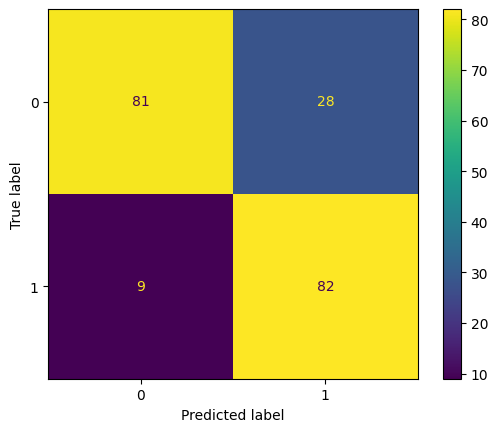

In [20]:
# lets check how accurately our model is working

# confusion_matrix will give us insights how many times our model had predicted correctly and how many times our model had predicted wrongly.

from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay
cm = confusion_matrix(sent_test, predict, labels=model.classes_)
display = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels=model.classes_)
display.plot()
plt.show()

In [ ]:
# If you take values as 0 and 0 hereby,
# 87 values are the false values.
# But 18 negative reviews are treated as positive reviews by our model.
# 77 actual positive reviews are predicted our model as positive reviews.
# 18 actual positive reviews are predicted our model as negative reviews.

In [21]:
# lets export this model and create a web application

import pickle as pk

In [22]:
pk.dump(model,open('model.pkl','wb'))

In [23]:
pk.dump(cv,open('scaler.pkl','wb'))

In [25]:
import pandas as pd 
import pickle as pk
from sklearn.feature_extraction.text import TfidfVectorizer
import streamlit as st

model = pk.load(open('model.pkl','rb'))
scaler = pk.load(open('scaler.pkl','rb'))
review = st.text_input('Enter Movie Review')

if st.button('Predict'):
    review_scale = scaler.transform([review]).toarray()
    result = model.predict(review_scale)
    if result[0] == 0:
        st.write('Negative Review')
    else:
        st.write('Positive Review')

2024-12-02 12:37:42.247 WARNING streamlit.runtime.scriptrunner_utils.script_run_context: Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-12-02 12:37:42.247 WARNING streamlit.runtime.scriptrunner_utils.script_run_context: Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-12-02 12:37:42.247 WARNING streamlit.runtime.scriptrunner_utils.script_run_context: Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-12-02 12:37:42.247 WARNING streamlit.runtime.scriptrunner_utils.script_run_context: Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-12-02 12:37:42.247 WARNING streamlit.runtime.state.session_state_proxy: Session state does not function when running a script without `streamlit run`
2024-12-02 12:37:42.247 WARNING streamlit.runtime.scriptrunner_utils.script_run_c